In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cm=pd.read_csv('capmetro_UT.csv')

<div class="alert alert-block alert-success">The daily hustle and bustle of university life is palpable, especially in how students and staff use the Capital Metro bus network around the UT Austin campus. Throughout the September to November 2018 semester, the following patterns emerged that paint a vivid picture of daily and monthly rhythms of bus ridership.

## 1. The Weekly Rhythm: From Monday Blues to Weekend Respite

<div class="alert alert-block alert-success"> 
<strong>Hourly Boarding Heatmap :</strong> This showcases peak bus usage by hour and day, with color intensity indicating boarding . This snapshot helps identify high-demand periods for travel throughout the week.<br>

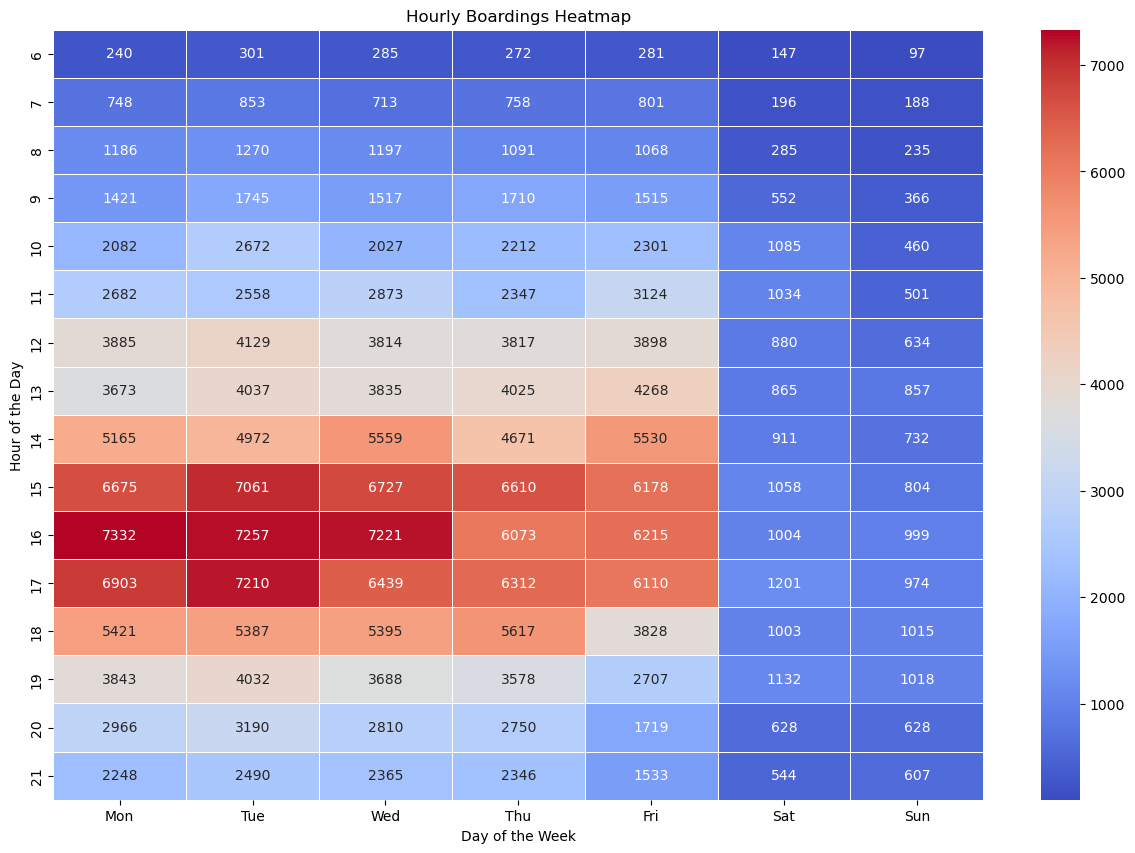

In [6]:
# Group by hour_of_day and day_of_week for boarding
grouped_boardings = cm.groupby(['hour_of_day', 'day_of_week']).boarding.sum().unstack().fillna(0)

# Weekdays ordering
weekdays_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

grouped_boardings = grouped_boardings[weekdays_order]

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(grouped_boardings, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Hourly Boardings Heatmap")
plt.ylabel("Hour of the Day")
plt.xlabel("Day of the Week")
plt.show()

<div class="alert alert-block alert-success"> 
<strong> Insights: </strong>
    
The Hourly Boarding Heatmap shows a clear pattern: from Monday to Thursday, the UT community's boarding peaks from 2 pm to 6 pm.<br>
By Friday, this trend shifts slightly earlier, with peak usage from 2 pm to 5 pm.<br>
This possibly indicates students and staff wrapping up their day earlier, eager for the weekend. <br>
And as one might anticipate, the weekends are significantly quieter, reflecting a campus at rest.

<div class="alert alert-block alert-success"> 
<strong> Hourly Ridership Heatmap :</strong> Similar to the above, but here, the color intensity indicates net ridership (boarding - alighting).<br>
Note that negative ridership figures in the context of our data indicate that more people alighted (got off) the bus than boarded (got on) during a given time window.

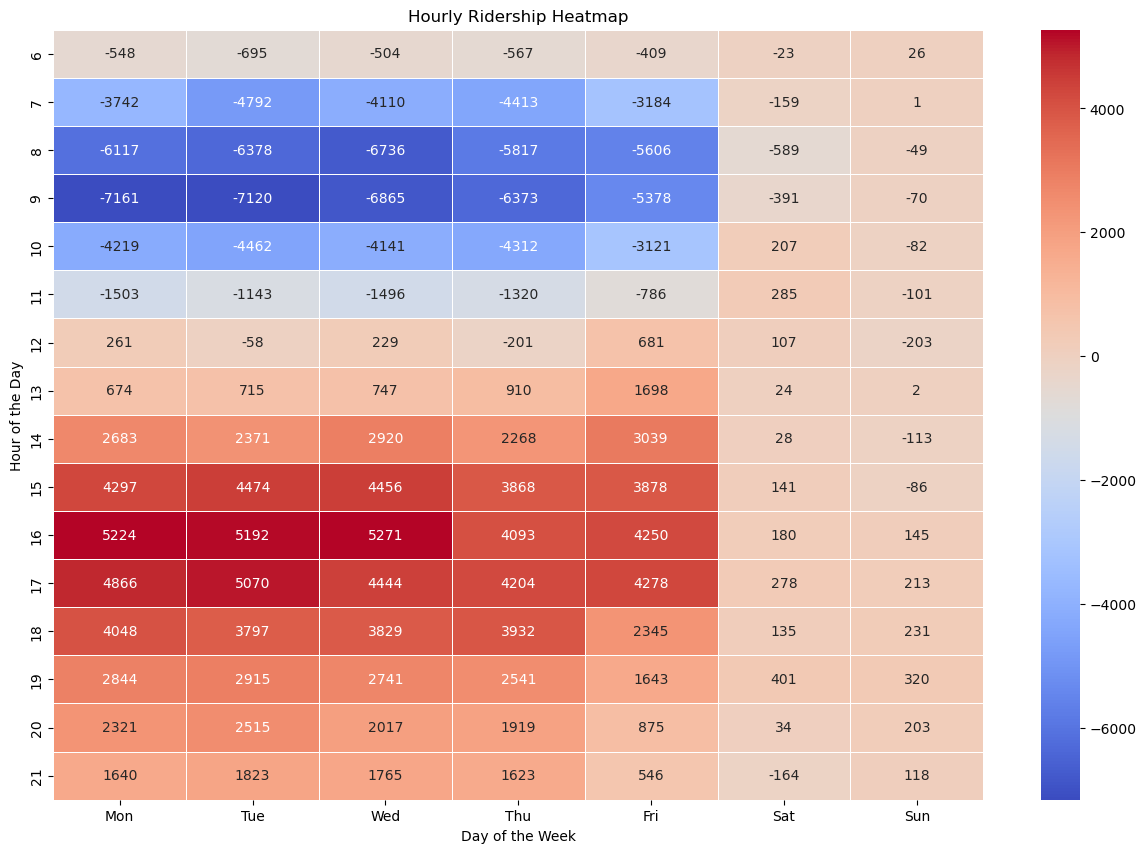

In [7]:
# Calculate net ridership
cm['net_ridership'] = cm['boarding'] - cm['alighting']

# Group by hour_of_day and day_of_week
grouped_nr = cm.groupby(['hour_of_day', 'day_of_week']).net_ridership.sum().unstack().fillna(0)


grouped_nr = grouped_nr[weekdays_order]

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(grouped_nr, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Hourly Ridership Heatmap")
plt.ylabel("Hour of the Day")
plt.xlabel("Day of the Week")
plt.show()

<div class="alert alert-block alert-success"> 
<strong> Insights: </strong>
    
The Hourly Ridership Heatmap further deepens this understanding.<br>
With the net ridership metric (boarding - alighting), it's evident that from Monday to Thursday, the busiest bus periods are from 2 pm to 8 pm.<br>
By Friday, this shifts to 1 pm to 7 pm.<br>
Again, weekends display minimal activity, which aligns with our boarding insights.

## 2. Temperature's subtle influence

<div class="alert alert-block alert-success"> 
<strong>Average Boardings and Temperature by hour of the day :</strong> 

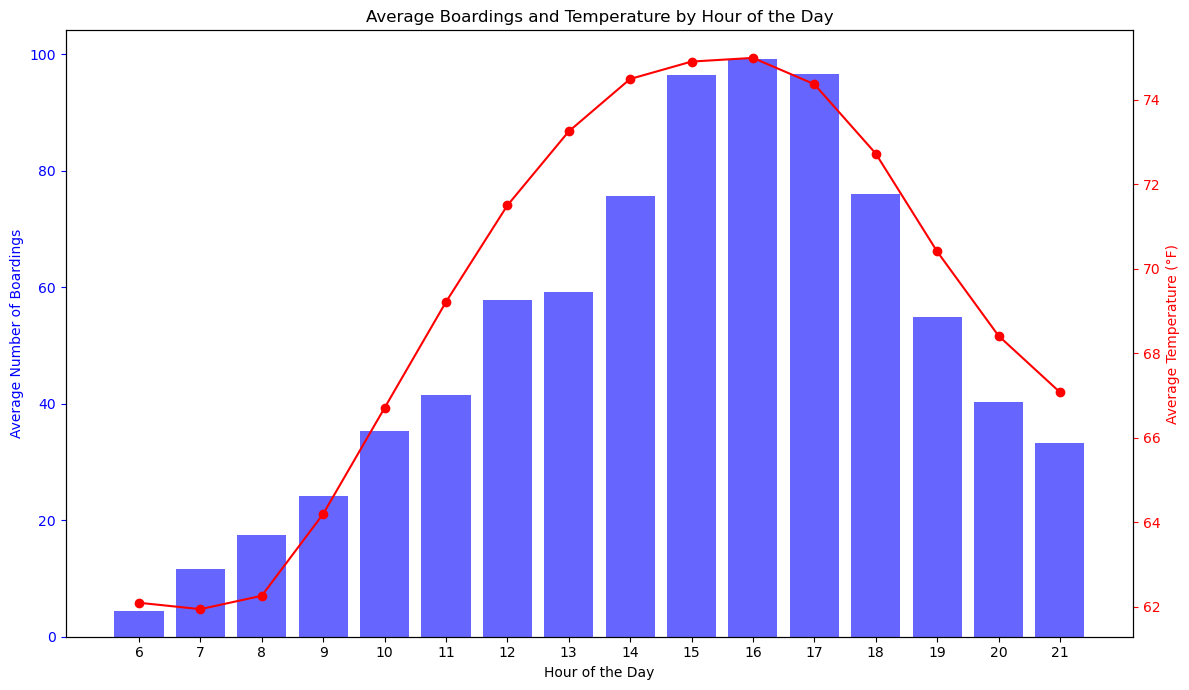

In [9]:
# Group by hour_of_day
grouped_hr = cm.groupby('hour_of_day').agg(avg_temp=('temperature', 'mean'), avg_boarding=('boarding', 'mean')).reset_index()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot average boardings on primary y-axis
ax1.bar(grouped_hr['hour_of_day'], grouped_hr['avg_boarding'], color='blue', alpha=0.6, label='Average Boardings')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Average Number of Boardings', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_xticks(grouped_hr['hour_of_day'])  # To ensure all hours are shown

# Create the secondary y-axis to plot average temperature
ax2 = ax1.twinx()
ax2.plot(grouped_hr['hour_of_day'], grouped_hr['avg_temp'], color='red', marker='o', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°F)', color='red')
ax2.tick_params('y', colors='red')

# Title and show the plot
plt.title('Average Boardings and Temperature by Hour of the Day')
plt.grid(False)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<strong> Insights: </strong><br>
    
The Average Boardings and Temperature by Hour of the Day uncovers an intriguing relationship.<br>
As the day progresses, the temperature tends to rise, peaking during midday. <br>
Concurrently, boardership also witnesses an uptick during these warmer hours. <br>
This mutual escalation gives an impression of a correlation between temperature and boardership. <br>
It's also possible that students and staff prefer to travel during the warmer parts of the day, or perhaps they're avoiding the chill of early mornings, especially during the fall semester. But given Austin's weather, that seems unlikely.

## 3. A Semester's Ebb and Flow

<div class="alert alert-block alert-success"> 
<strong>Average Boardings across Months :</strong> 

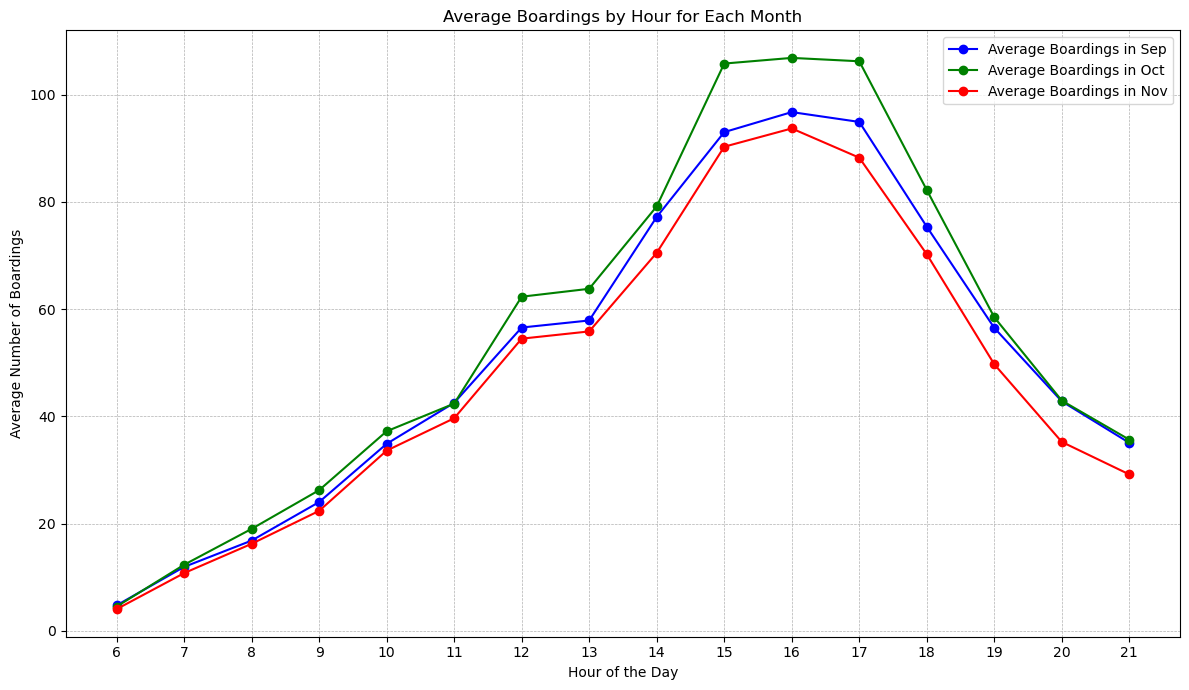

In [10]:
# Group by hour_of_day and month
grouped_hr_month = cm.groupby(['hour_of_day', 'month']).boarding.mean().unstack().reset_index()

# Set up the figure
plt.figure(figsize=(12, 7))

# Plot for each month
months = ['Sep', 'Oct', 'Nov']
colors = ['blue', 'green', 'red']

for month, color in zip(months, colors):
    plt.plot(grouped_hr_month['hour_of_day'], grouped_hr_month[month], color=color, marker='o', label=f'Average Boardings in {month}')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Boardings')
plt.title('Average Boardings by Hour for Each Month')
plt.xticks(grouped_hr_month['hour_of_day'])  # To ensure all hours are shown
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<strong> Insights: </strong><br>
As we transition through months, the Average Boardings across Months reveals an arc in bus usage.<br> Starting in September, the numbers rise in October, suggesting an increased reliance or familiarity with the bus system as the semester progresses. <br>
However, as November rolls around – perhaps as students bunker down for finals or projects – the numbers dip below even September levels.<br>
The distribution of boarding across hours of the day remains consistent across the months<br>

## 4. Day-to-Day Fluctuations: Workdays versus Weekends

<div class="alert alert-block alert-success"> 
<strong>Average Daily Boardings & Alightings : September to November

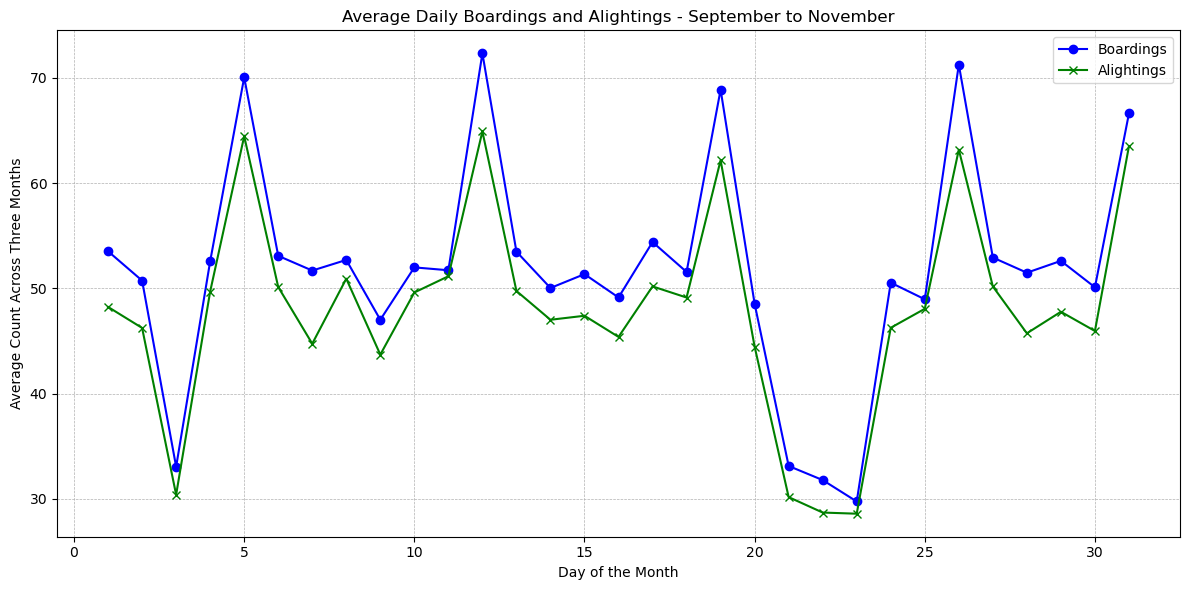

In [12]:
# Extract day from timestamp
cm['day'] = pd.to_datetime(cm['timestamp']).dt.day

# Group data by day only
grouped_day = cm.groupby(['day']).agg({'boarding': 'mean', 'alighting': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for boardings and alightings
plt.plot(grouped_day['day'], grouped_day['boarding'], label='Boardings', color='blue', marker='o')
plt.plot(grouped_day['day'], grouped_day['alighting'], label='Alightings', color='green', marker='x')

plt.xlabel('Day of the Month')
plt.ylabel('Average Count Across Three Months')
plt.title('Average Daily Boardings and Alightings - September to November')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<strong> Insights: </strong>
    
The Daily Boardings & Alightings from September to November shows a cyclical pattern. <br>
There's a clear increase in boardings during weekdays and a decrease during weekends.<br>
Additionally, there's a noticeable reduction in boardings during weekends at the end of each month. <br>
This drop could be attributed to long weekends, holidays, or students taking breaks.

<div class="alert alert-block alert-success">In conclusion, the Capital Metro data reveals distinct daily and monthly travel patterns at UT Austin during the fall semester, offering insights for transportation planning and campus activity.